In [1]:
"""
Vraj Mistry
109951458
Assignment 2 
"""
# Part1  real- world sceniro dataset
import matplotlib.pyplot as plt                   
import numpy as np                              
import pandas as pd
import statistics as st
import random

dataList = pd.read_csv('flu-clinicallab-byregion-fluseason.csv')         #reading the file "diabetes.tab.csv" from computer 
 

In [30]:
dataList.isnull().any()   # to check if there is any null files in the dataset

dataList1 = dataList.dropna(axis = 0, how ='any')  # to drop all the cell with null values 

dataList1.head() # checking the data


,season,date_code,weekending,region,Respiratory_Virus,Number_Positive,Specimens_Tested,Percent_Positive
0,2009-2010,200940,10/10/09,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10/10/09,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10/10/09,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10/10/09,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10/10/09,California,Influenza_A,1077,3324,32.40


In [3]:
#part 2A repeating 
dataList1['Percent_Positive'].mean()        #mean of designated column in the dataset

4.132762234305507

In [4]:
dataList1['Percent_Positive'].median()        #median of designated column in the dataset      

0.87

In [5]:
dataList1['Percent_Positive'].mode()        #mode of designated column in the dataset        

0    0.0
dtype: float64

In [6]:
dataList1['Percent_Positive'].describe()        #dispersion of designated column in the dataset       

count    30345.000000
mean         4.132762
std          7.261318
min          0.000000
25%          0.000000
50%          0.870000
75%          4.880000
max        100.000000
Name: Percent_Positive, dtype: float64

In [7]:
dataList1['Specimens_Tested'].mean()        #mean of designated column in the dataset       

394.07704728950404

In [8]:
dataList1['Specimens_Tested'].median()        #median of designated column in the dataset  

167.0

In [9]:
dataList1['Specimens_Tested'].mode()        #mode of designated column in the dataset   

0    45
dtype: int64

In [10]:
dataList1['Specimens_Tested'].describe()        #dispersion of designated column in the dataset 

count    30345.000000
mean       394.077047
std        617.379448
min          1.000000
25%         73.000000
50%        167.000000
75%        453.000000
max       8046.000000
Name: Specimens_Tested, dtype: float64

In [11]:
dataList1['Number_Positive'].mean()        #mean of designated column in the dataset 

23.793244356566156

In [12]:
dataList1['Number_Positive'].median()         #median of designated column in the dataset

2.0

In [13]:
dataList1['Number_Positive'].mode()        #mode of designated column in the dataset

0    0
dtype: int64

In [14]:
dataList1['Number_Positive'].describe()        #dispersion of designated column in the dataset 

count    30345.000000
mean        23.793244
std         96.076884
min          0.000000
25%          0.000000
50%          2.000000
75%         10.000000
max       3125.000000
Name: Number_Positive, dtype: float64

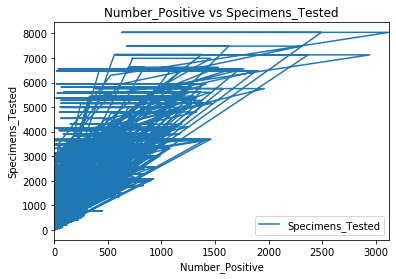

In [48]:
dataList1.plot(x='Number_Positive', y='Specimens_Tested',kind = "line") #graph of column x axis="AGE" vs  y axis = column  "BMI" and type of graph is bar
plt.title("Number_Positive vs Specimens_Tested")     #graph title 
plt.xlabel("Number_Positive")  # labeling X - axis
plt.ylabel("Specimens_Tested") # labeling Y- axis
plt.show()           #showing the graph

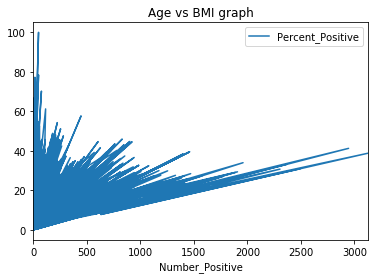

In [17]:
dataList1.plot(x='Specimens_Tested', y='Percent_Positive',kind = "line") #graph of column x axis="AGE" vs  y axis = column  "BMI" and type of graph is bar
plt.title("Specimens_Tested vs Percent_Positive")   #graph title 
plt.ylabel("Percent_Positive")  # labeling Y - axis
plt.xlabel("Specimens_Tested") # labeling X- axis
plt.show()   #outputing the graph

In [18]:
dataList1.corr()

,date_code,Number_Positive,Specimens_Tested,Percent_Positive
date_code,1.000000,-0.019158,0.074711,-0.073769
Number_Positive,-0.019158,1.000000,0.671866,0.466821
Specimens_Tested,0.074711,0.671866,1.000000,0.167456
Percent_Positive,-0.073769,0.466821,0.167456,1.000000


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

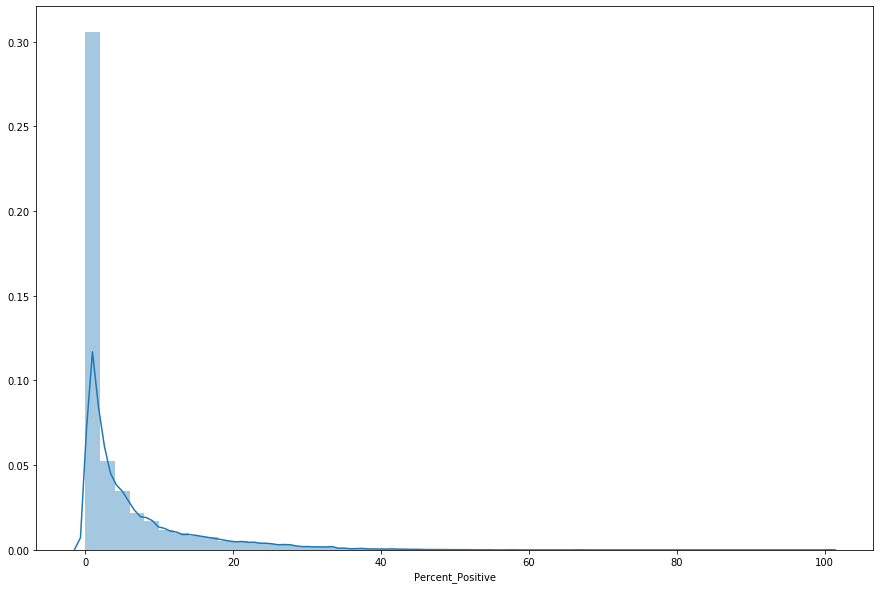

In [46]:
#Linear Regression 
import math as sqrt
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

X = dataList1[["Number_Positive", "Specimens_Tested"]].values        # X plot for BMI, BP to get the result of both predictors on Y 
Y = dataList1["Percent_Positive"].values                  # Y plot for Y column 


plt.figure(figsize=(15,10))              #  adjusting figure size 
plt.tight_layout()                     # making sure if the data is big it will be in the image 
seabornInstance.distplot(dataList1['Percent_Positive'])      # looking for the average values expected in column Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #training the cases and to compare result

line1 = LinearRegression()        # doing Linear regression
line1.fit(X_train,Y_train)      #using the fit function to make sure the graph is fit





In [47]:
coeff_datalist = pd.DataFrame(line1.coef_, ["Number_Positive","Specimens_Tested"], columns = ["Coeff"])     #checking the coefficent to see what train and actual values are
coeff_datalist


,Coeff
Number_Positive,0.048787
Specimens_Tested,-0.003112


In [23]:
y_prediction = line1.predict(X_test)           #taking the Y prediction for testing results

newdatalist = pd.DataFrame({'Original': Y_test, 'Predict': y_prediction}) #making new datalist to make the ouptut clearer
newdatalist1 = newdatalist.head(25) #output the datalist to compare results for both values

newdatalist1 #outputting

,Original,Predict
0,0.00,3.765260
1,0.00,4.138780
2,0.00,3.613319
3,0.33,3.277864
4,0.00,4.135615
5,28.47,8.813940
6,2.60,3.398946
7,1.00,2.857180
8,33.59,11.490340
9,1.66,0.956192


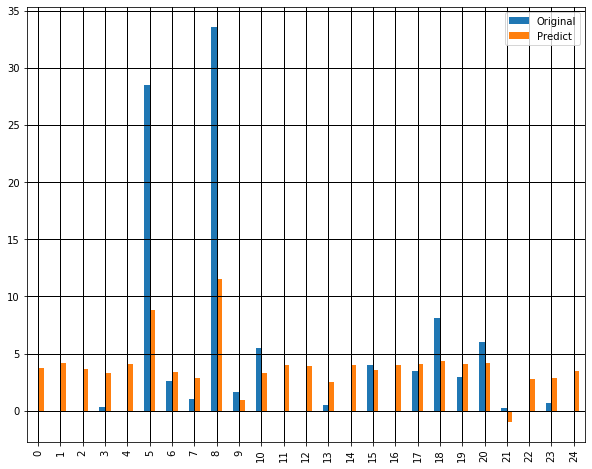

In [33]:
newdatalist1.plot(kind='bar',figsize=(10,8))         # plotting the graph and adjusting the figure values
plt.grid(which ='major', linestyle='-', linewidth='1.0', color='black')  # 
plt.grid(which ='minor', linestyle=':', linewidth='1.0', color='yellow') #
plt.show() #outputting graph

In [26]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_prediction)) #calculating mean squared error

Mean Squared Error: 39.55300239241981
